In [158]:
import pandas as pd
%matplotlib inline

In [159]:
df = pd.read_csv("GOOS.TO.csv", index_col="Date", parse_dates=True,)

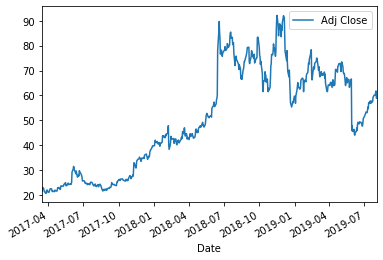

In [160]:
df[["Adj Close"]].plot()

In [161]:
df[["Volume"]]

,Volume
Date,
2017-03-16,7118900
2017-03-17,1523200
2017-03-20,494100
2017-03-21,335700
2017-03-22,400500
2017-03-23,135600
2017-03-24,248500
2017-03-27,358400
2017-03-28,159200


In [162]:
df2 = df[["Adj Close"]]

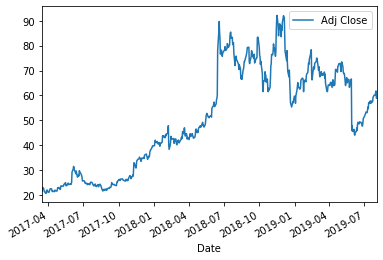

In [163]:
df2.plot()

In [164]:
def dfPlot(dataFrame,title="Stock prices"):
    ax = dataFrame.plot(title=title,fontsize=10)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")

In [165]:
#dfPlot(df2.rolling(window=20).mean())

In [166]:
def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band = rm + 2*(rstd)
    lower_band = rm - 2*(rstd)
    return upper_band, lower_band

In [167]:
dfRollingMean = df2.rolling(window=20).mean()

In [168]:
dfRollingMean

,Adj Close
Date,
2017-03-16,NaN
2017-03-17,NaN
2017-03-20,NaN
2017-03-21,NaN
2017-03-22,NaN
2017-03-23,NaN
2017-03-24,NaN
2017-03-27,NaN
2017-03-28,NaN


In [169]:
df2

,Adj Close
Date,
2017-03-16,21.530001
2017-03-17,23.000000
2017-03-20,22.750000
2017-03-21,22.049999
2017-03-22,21.400000
2017-03-23,21.340000
2017-03-24,20.950001
2017-03-27,20.600000
2017-03-28,21.790001


In [232]:
dfRollingMean.columns = ["Rolling Mean"]

In [170]:
dfRollingMean

,Adj Close
Date,
2017-03-16,NaN
2017-03-17,NaN
2017-03-20,NaN
2017-03-21,NaN
2017-03-22,NaN
2017-03-23,NaN
2017-03-24,NaN
2017-03-27,NaN
2017-03-28,NaN


In [171]:
dfSTD = df2.rolling(window=20).std()

In [172]:
dfSTD

,Adj Close
Date,
2017-03-16,NaN
2017-03-17,NaN
2017-03-20,NaN
2017-03-21,NaN
2017-03-22,NaN
2017-03-23,NaN
2017-03-24,NaN
2017-03-27,NaN
2017-03-28,NaN


In [173]:
upperBand, lowerBand = get_bollinger_bands(dfRollingMean, dfSTD)

In [174]:
upperBand

,Adj Close
Date,
2017-03-16,NaN
2017-03-17,NaN
2017-03-20,NaN
2017-03-21,NaN
2017-03-22,NaN
2017-03-23,NaN
2017-03-24,NaN
2017-03-27,NaN
2017-03-28,NaN


In [176]:
upperBand.columns = ["Upper Band"]

In [177]:
lowerBand.columns = ["Lower Band"]

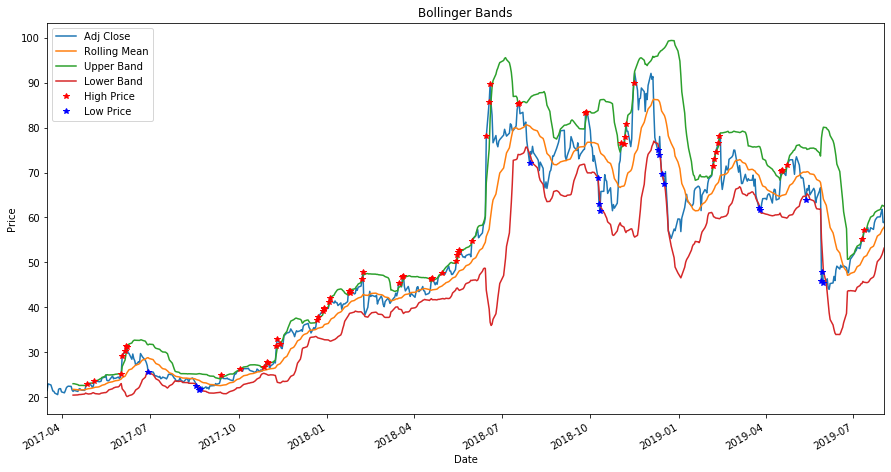

In [243]:
ax = df2.plot(title="Bollinger Bands")
dfRollingMean.plot(label='Rolling mean', ax=ax) #how to fix labels?
upperBand.plot(label='upper band', ax=ax)
lowerBand.plot(label='lower band', ax=ax)
#anomDF.plot(style="*", x="Date" ,y="Price",  ax=ax)
anomDFhi.plot(style="*", x="Date" ,y="High Price",  ax=ax,color="r")
anomDFlo.plot(style="*", x="Date" ,y="Low Price",  ax=ax,color="b", figsize=(15,8))


ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')


In [222]:
def markAnom(df, upper_band, lower_band):
    anomList = list()
    hi_list = list()
    lo_list = list()
    for index, row in df.iterrows():
        #print(df.loc[index]["Adj Close"])
        if df.loc[index]["Adj Close"] > upper_band.loc[index]["Upper Band"]:
            anomList.append({"Date" : index, "Price" : df.loc[index]["Adj Close"]})
            hi_list.append({"Date" : index, "High Price" : df.loc[index]["Adj Close"]})
        if df.loc[index]["Adj Close"] < lower_band.loc[index]["Lower Band"]:
            anomList.append({"Date" : index, "Price" : df.loc[index]["Adj Close"]})
            lo_list.append({"Date" : index, "Low Price" : df.loc[index]["Adj Close"]})
    return anomList, hi_list, lo_list

In [223]:
anL,anHL,anLL = markAnom(df2,upperBand,lowerBand)

In [224]:
anomDF = pd.DataFrame(anL)
anomDFhi = pd.DataFrame(anHL)
anomDFlo = pd.DataFrame(anLL)

In [258]:
anomDF.mean()

Price    52.916731
dtype: float64

In [257]:
anomDFlo

,Date,Low Price
0,2017-06-29,25.639999
1,2017-08-18,22.549999
2,2017-08-21,21.559999
3,2017-08-22,21.809999
4,2018-07-30,72.010002
5,2018-10-09,68.800003
6,2018-10-10,62.990002
7,2018-10-11,61.540001
8,2018-12-10,75.000000
9,2018-12-11,73.980003


In [226]:
anomDF["Date"] = pd.to_datetime(anomDF["Date"])

In [227]:
anomDFhi["Date"] = pd.to_datetime(anomDFhi["Date"])

In [228]:
anomDFlo["Date"] = pd.to_datetime(anomDFlo["Date"])

In [235]:
result = (1234*115603)+1234

In [236]:
result % 13

5

In [237]:
pyStr = "Hello World"

In [238]:
pyStr[0:2]

'He'

In [239]:
pyStr[2:]

'llo World'

In [276]:
def CreateBuillingerBands(df):
    
    dfRollingMean = df.rolling(window=20).mean()
    dfSTD = df.rolling(window=20).std()
    
    upperBand, lowerBand = get_bollinger_bands(dfRollingMean, dfSTD)
    
    dfRollingMean.columns = ["Rolling Mean"]
    upperBand.columns = ["Upper Band"]
    lowerBand.columns = ["Lower Band"]
    
    anL,anHL,anLL = markAnom(df,upperBand,lowerBand)
    
    anomDF = pd.DataFrame(anL)
    anomDFhi = pd.DataFrame(anHL)
    anomDFlo = pd.DataFrame(anLL)
    print(anomDFlo)
    
    anomDF["Date"] = pd.to_datetime(anomDF["Date"])
    anomDFhi["Date"] = pd.to_datetime(anomDFhi["Date"])
    anomDFlo["Date"] = pd.to_datetime(anomDFlo["Date"])
    
    ax = df.plot(title="Bollinger Bands")
    dfRollingMean.plot(label='Rolling mean', ax=ax) #how to fix labels?
    upperBand.plot(label='upper band', ax=ax)
    lowerBand.plot(label='lower band', ax=ax)
    #anomDF.plot(style="*", x="Date" ,y="Price",  ax=ax)
    anomDFhi.plot(style="*", x="Date" ,y="High Price",  ax=ax,color="r")
    anomDFlo.plot(style="*", x="Date" ,y="Low Price",  ax=ax,color="b", figsize=(15,10))


    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')

In [277]:
dfFB = pd.read_csv("WM.csv", index_col="Date", parse_dates=True,)

In [278]:
dfFB.info

<bound method DataFrame.info of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
1988-06-22    4.625000    4.750000    4.625000    4.625000    2.864912   
1988-06-23    4.500000    4.500000    4.250000    4.250000    2.632621   
1988-06-24    4.375000    4.375000    4.375000    4.375000    2.710051   
1988-06-27    4.375000    4.375000    4.250000    4.250000    2.632621   
1988-06-28    4.250000    4.250000    4.000000    4.000000    2.477761   
1988-06-29    4.125000    4.250000    4.125000    4.125000    2.555191   
1988-06-30    4.375000    4.500000    4.375000    4.375000    2.710051   
1988-07-01    4.750000    4.875000    4.750000    4.750000    2.942342   
1988-07-05    4.750000    4.875000    4.625000    4.625000    2.864912   
1988-07-06    4.625000    4.625000    4.500000    4.500000    2.787482   
1988-07-07    4.500000    4.625000    4.500000    4.500000    2.787482   
1988-0

          Date   Low Price
0   1988-07-20    2.400331
1   1988-08-10    2.013181
2   1988-08-16    1.935752
3   1988-08-17    1.703461
4   1988-08-18    1.703461
5   1988-12-09    1.471171
6   1988-12-14    1.393741
7   1989-02-10    1.703461
8   1989-02-13    1.626031
9   1989-02-14    1.626031
10  1989-06-02    1.393741
11  1989-06-09    1.316311
12  1989-06-21    1.161451
13  1989-07-21    1.084021
14  1989-08-18    1.006591
15  1989-08-24    1.006591
16  1989-09-19    1.006591
17  1989-09-21    0.929160
18  1989-09-22    0.929160
19  1989-11-09    1.084021
20  1989-12-18    1.084021
21  1989-12-20    1.084021
22  1989-12-21    1.006591
23  1989-12-22    0.929160
24  1989-12-26    0.929160
25  1990-01-30    0.851730
26  1991-10-15   10.065904
27  1991-11-06    9.601323
28  1992-02-24    9.911043
29  1992-02-25    9.601323
..         ...         ...
306 2016-01-15   47.586548
307 2016-07-29   61.930309
308 2016-08-16   60.853176
309 2016-08-26   59.916553
310 2016-09-09   59.148960
3

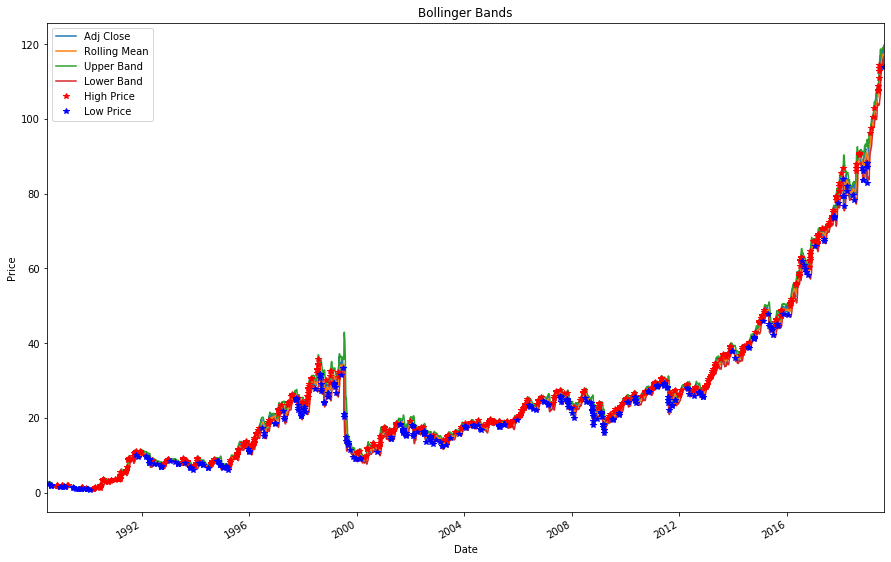

In [282]:
CreateBuillingerBands(dfFB[["Adj Close"]])

In [263]:
!ls

CAT_All_Events_Json_specV2_15K.txt
CATtrail.txt
FB.csv
GOOS.TO.csv
PS_20174392719_1491204439457_log.csv
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
catTrailTransform.ipynb
predicting-fraud-in-financial-payment-services.ipynb
statsCanZipTest.ipynb
stock_detect.ipynb
sunspots.txt
wget-log
